In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_booking.csv', encoding='latin')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


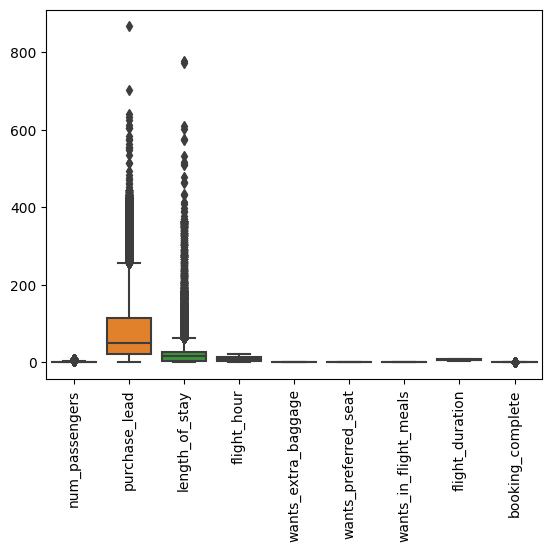

In [5]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

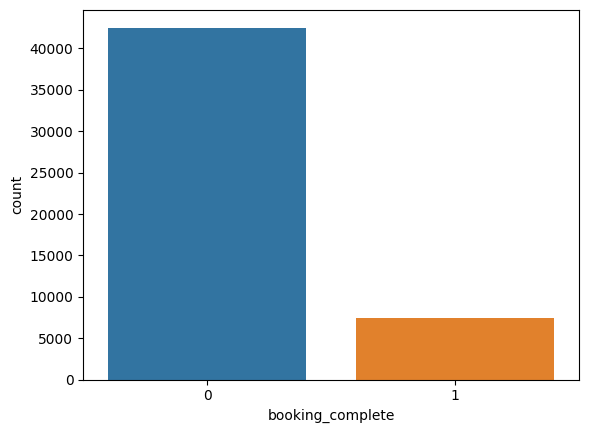

In [6]:
sns.countplot(data=df, x='booking_complete')

In [7]:
df.select_dtypes('object').apply(lambda x: len(x.unique()))

sales_channel       2
trip_type           3
flight_day          7
route             799
booking_origin    104
dtype: int64

In [8]:
df=df.drop(['route','booking_origin'], axis=1)

In [9]:
days={'Sun':0,'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6}

In [10]:
df['flight_day']=df['flight_day'].map(days)

In [11]:
df_dummy=pd.get_dummies(df,drop_first=True)

<AxesSubplot:>

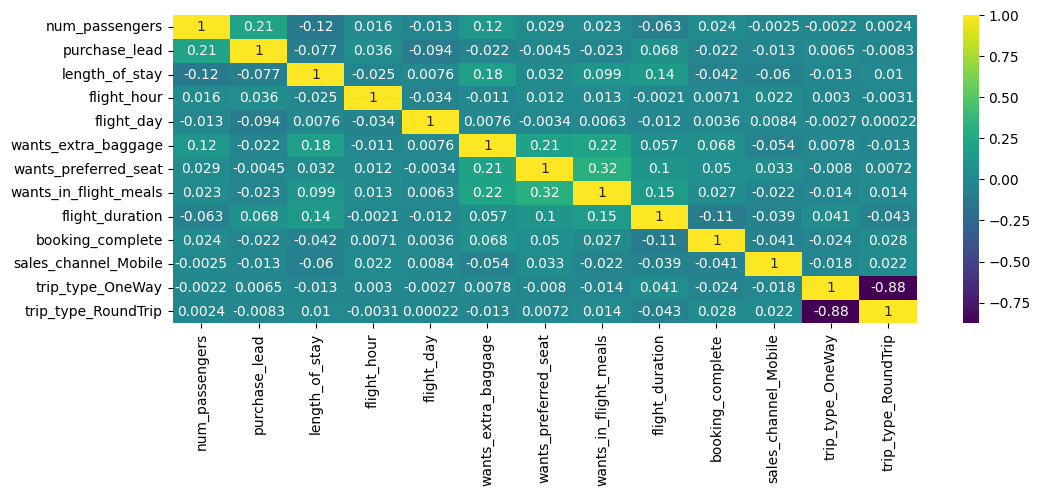

In [12]:
plt.figure(figsize=(12,4))
sns.heatmap(df_dummy.corr(), cmap='viridis', annot=True)

In [13]:
X=df_dummy.drop('booking_complete', axis=1)
y=df_dummy['booking_complete']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression(class_weight='balanced', max_iter=10000)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [28]:
y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70     12784
           1       0.20      0.63      0.31      2216

    accuracy                           0.58     15000
   macro avg       0.55      0.60      0.50     15000
weighted avg       0.80      0.58      0.64     15000



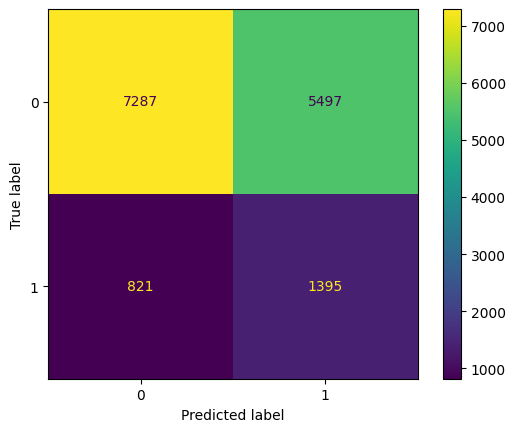

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [66]:
model.coef_

array([[ 2.90369319e-02, -4.90563349e-04, -4.63607360e-03,
         6.21957866e-03, -5.51218334e-03,  3.89035359e-01,
         2.66858802e-01,  1.14555682e-01, -1.97608148e-01,
        -4.79226070e-01, -3.05545773e-01,  7.88190393e-01]])

In [41]:
coef=pd.DataFrame({'Parameter':X.columns, 'Coefficient':model.coef_[0]}).sort_values('Coefficient')

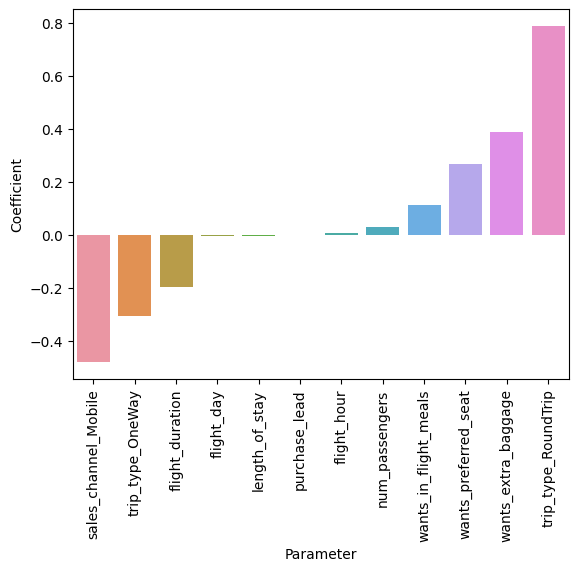

In [51]:
sns.barplot(data=coef, x='Parameter', y='Coefficient')
plt.xticks(rotation=90)
plt.savefig('Coefficients.png',bbox_inches='tight');